<a href="https://colab.research.google.com/github/aryanrajrcotba/Lung-Cancer-Data-Set-Review-and-Training-Model-/blob/main/Lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
def train_model_on_dataset(dataset_path, dataset_name):
    # Prepare data
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    # Simple CNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, validation_data=val_data, epochs=10)

    # Plot accuracy graph
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Model Accuracy for {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history


Found 12040 images belonging to 3 classes.
Found 3009 images belonging to 3 classes.
Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2417s 6s/step - accuracy: 0.7415 - loss: 0.6681 - val_accuracy: 0.8960 - val_loss: 0.2650
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9021 - loss: 0.2441 - val_accuracy: 0.9206 - val_loss: 0.1960
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.9537 - loss: 0.1227 - val_accuracy: 0.9295 - val_loss: 0.1736
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9766 - loss: 0.0692 - val_accuracy: 0.9395 - val_loss: 0.1621
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.9801 - loss: 0.0562 - val_accuracy: 0.9206 - val_loss: 0.2227
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9169 - val_loss: 0.2361
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9875 - loss: 0.0340 - val_accuracy: 0.9305 - val_loss: 0.2305
Epoch 8/10


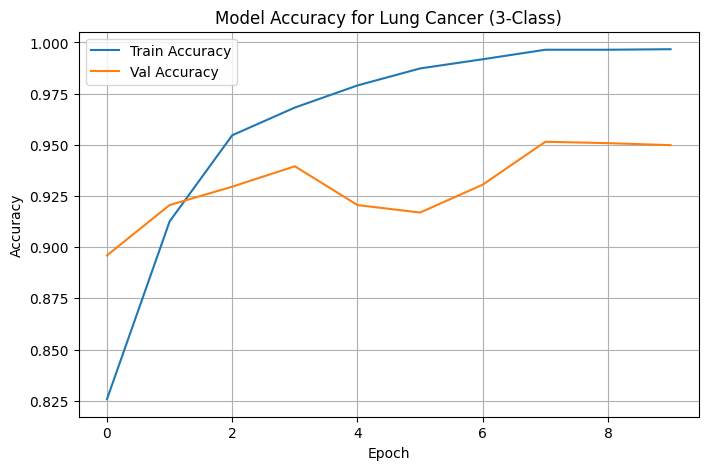

In [ ]:
def train_model_on_dataset(dataset_path, dataset_name):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, validation_data=val_data, epochs=10)

    # Plot accuracy graph
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Model Accuracy for {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history

# Use the unified dataset path
dataset_path = "/content/drive/MyDrive/Lung_Cancer_Data_Set/lung_colon_image_set/lung_image_sets"

model, history = train_model_on_dataset(dataset_path, "Lung Cancer (3-Class)")


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

def train_binary_model(dataset_path, dataset_name):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary',
        subset='training',
        shuffle=True
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        shuffle=False
    )

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, validation_data=val_data, epochs=10)

    # Plot accuracy graph
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy - {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history


In [2]:
import os
import shutil
from glob import glob

# Original folders
base_path = "/content/drive/MyDrive/Lung_Cancer_Data_Set/lung_colon_image_set/lung_image_sets"
classes = ["lung_aca", "lung_n", "lung_scc"]

# Output path
output_root = "/content/lung_data_binary"
os.makedirs(output_root, exist_ok=True)

for main_class in classes:
    # Create binary folder
    binary_folder = os.path.join(output_root, f"{main_class}_vs_others")
    positive_folder = os.path.join(binary_folder, "positive")
    negative_folder = os.path.join(binary_folder, "negative")
    os.makedirs(positive_folder, exist_ok=True)
    os.makedirs(negative_folder, exist_ok=True)

    # Copy positive images (current class)
    pos_images = glob(os.path.join(base_path, main_class, "*.jpeg")) + \
                 glob(os.path.join(base_path, main_class, "*.jpg")) + \
                 glob(os.path.join(base_path, main_class, "*.png"))

    for img_path in pos_images:
        shutil.copy(img_path, positive_folder)

    # Copy negative images (all other classes)
    for other_class in classes:
        if other_class == main_class:
            continue
        neg_images = glob(os.path.join(base_path, other_class, "*.jpeg")) + \
                     glob(os.path.join(base_path, other_class, "*.jpg")) + \
                     glob(os.path.join(base_path, other_class, "*.png"))

        for img_path in neg_images:
            shutil.copy(img_path, negative_folder)

    print(f"✅ Created binary dataset: {main_class}_vs_others — {len(pos_images)} positive, {len(os.listdir(negative_folder))} negative")


✅ Created binary dataset: lung_aca_vs_others — 5010 positive, 10039 negative
✅ Created binary dataset: lung_n_vs_others — 5000 positive, 10049 negative
✅ Created binary dataset: lung_scc_vs_others — 5039 positive, 10010 negative



Training on Lung ACA vs Others...
Found 12040 images belonging to 2 classes.
Found 3009 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 379s 999ms/step - accuracy: 0.6971 - loss: 0.7774 - val_accuracy: 0.8408 - val_loss: 0.3152
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 359s 952ms/step - accuracy: 0.8712 - loss: 0.3146 - val_accuracy: 0.9209 - val_loss: 0.1919
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 334s 886ms/step - accuracy: 0.8757 - loss: 0.2937 - val_accuracy: 0.8966 - val_loss: 0.2288
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 357s 948ms/step - accuracy: 0.9010 - loss: 0.2436 - val_accuracy: 0.9515 - val_loss: 0.1195
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 368s 909ms/step - accuracy: 0.9175 - loss: 0.2113 - val_accuracy: 0.9621 - val_loss: 0.1035
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 335s 886ms/step - accuracy: 0.9181 - loss: 0.1978 - val_accuracy: 0.9631 - val_loss: 0.1061
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 340s 901ms/step - accuracy: 0.9251 - loss: 0.1743 - val_accuracy: 0.9412 - val_loss: 0.1841
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 342s 908ms/step - accuracy: 0.9436 -

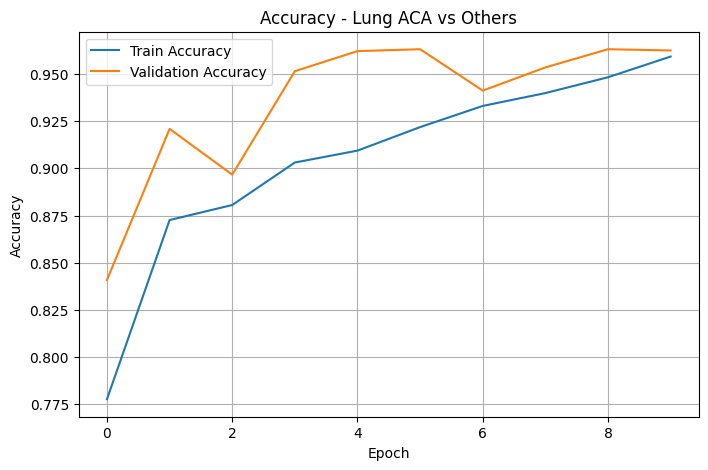

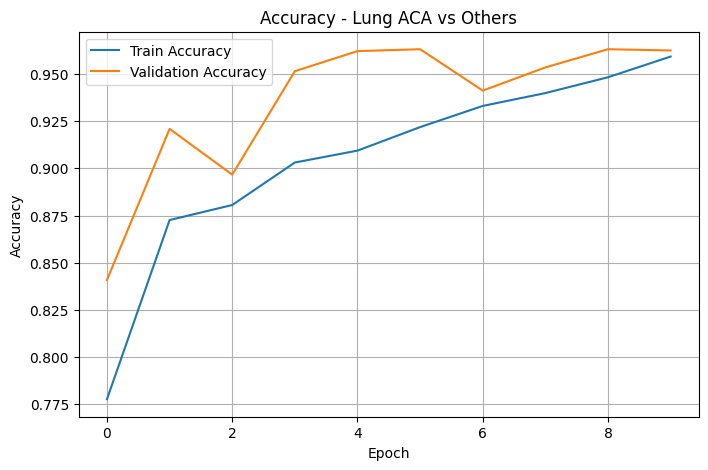


Training on Lung N vs Others...
Found 12040 images belonging to 2 classes.
Found 3009 images belonging to 2 classes.
Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 348s 919ms/step - accuracy: 0.9095 - loss: 0.3759 - val_accuracy: 0.9781 - val_loss: 0.0566
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 340s 901ms/step - accuracy: 0.9831 - loss: 0.0496 - val_accuracy: 0.9807 - val_loss: 0.0527
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 336s 892ms/step - accuracy: 0.9895 - loss: 0.0310 - val_accuracy: 0.9870 - val_loss: 0.0383
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 343s 910ms/step - accuracy: 0.9941 - loss: 0.0160 - val_accuracy: 0.9874 - val_loss: 0.0413
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 345s 914ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9907 - val_loss: 0.0385
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 332s 881ms/step - accuracy: 0.9999 - loss: 9.0109e-04 - val_accuracy: 0.9910 - val_loss: 0.0525
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 335s 889ms/step - accuracy: 1.0000 - loss: 3.5

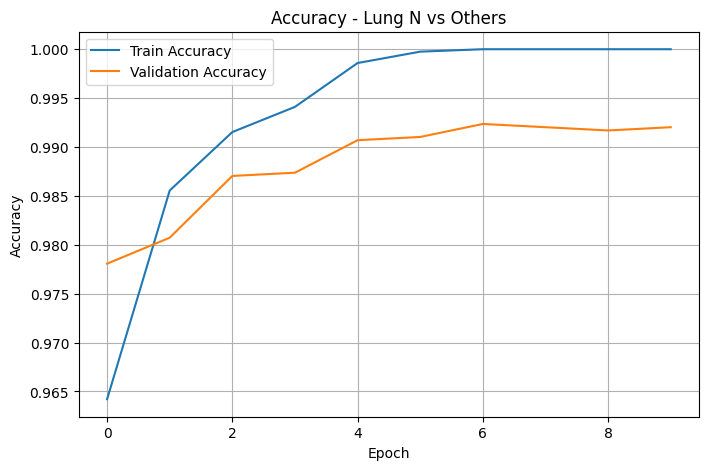

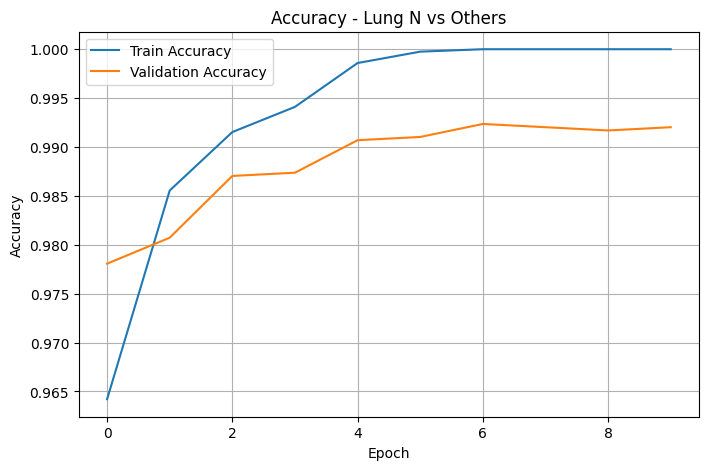


Training on Lung SCC vs Others...
Found 12040 images belonging to 2 classes.
Found 3009 images belonging to 2 classes.
Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.8414 - loss: 0.4106 - val_accuracy: 0.8421 - val_loss: 0.3947
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 328s 870ms/step - accuracy: 0.9300 - loss: 0.1680 - val_accuracy: 0.8774 - val_loss: 0.2884
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 333s 884ms/step - accuracy: 0.9485 - loss: 0.1227 - val_accuracy: 0.9176 - val_loss: 0.2123
Epoch 4/10
220/377 ━━━━━━━━━━━━━━━━━━━━ 2:04 794ms/step - accuracy: 0.9713 - loss: 0.0789

In [ ]:
dataset_paths = {
"Lung ACA vs Others": "/content/lung_data_binary/lung_aca_vs_others",
"Lung N vs Others": "/content/lung_data_binary/lung_n_vs_others",
"Lung SCC vs Others": "/content/lung_data_binary/lung_scc_vs_others"
}

trained_models = {}  # Dictionary to store trained models and histories

for name, path in dataset_paths.items():
    print(f"\nTraining on {name}...")
    # Train the model and get the history
    model, history = train_binary_model(path, name)

    # Store the trained model and history
    trained_models[name] = {"model": model, "history": history}

    # Plot training history
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy - {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

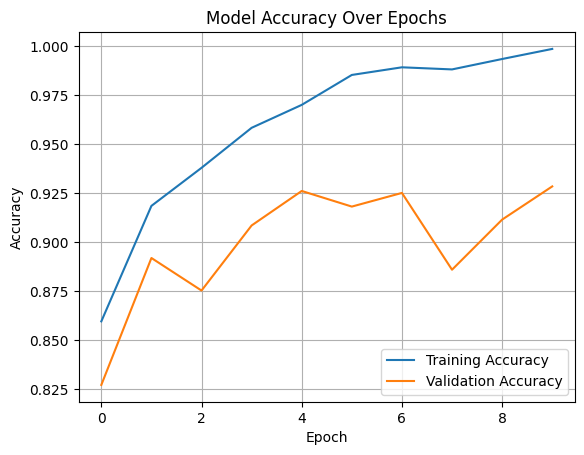

In [15]:
import matplotlib.pyplot as plt


# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator



dataset_paths = {
"Lung ACA vs Others": "/content/lung_data_binary/lung_aca_vs_others",
"Lung N vs Others": "/content/lung_data_binary/lung_n_vs_others",
"Lung SCC vs Others": "/content/lung_data_binary/lung_scc_vs_others"
}

for name, path in dataset_paths.items():
    print(f"\nEvaluating {name}...")
    # Re-create the data generators to ensure consistent validation data
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    val_data = datagen.flow_from_directory(
        path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        shuffle=False  # Important to keep data in order for evaluation
    )

    # Get the trained model from the dictionary
    if name in trained_models:
        model = trained_models[name]["model"]
    else:
        print(f"Model for {name} not found. Skipping evaluation.")
        continue

    # Get predictions
    predictions = model.predict(val_data)
    predicted_classes = (predictions > 0.5).astype(int) # For binary classification

    # Get true labels
    true_classes = val_data.classes
    class_indices = val_data.class_indices


    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"Accuracy for {name}: {accuracy:.4f}")


Evaluating Lung ACA vs Others...
Found 3009 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 349ms/step
Accuracy for Lung ACA vs Others: 0.6873

Evaluating Lung N vs Others...
Found 3009 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 32s 330ms/step
Accuracy for Lung N vs Others: 0.6218

Evaluating Lung SCC vs Others...
Found 3009 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step
Accuracy for Lung SCC vs Others: 0.9285
